# Visualize benchmarking results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(context='paper', style='ticks', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

## Read results

In [3]:
### Null simulation ###
null_sim_hitrates = pd.read_csv('results/null_sim_hitrates.tsv', sep='\t', index_col=0)
null_sim_pct_sig_cluster = pd.read_csv('results/null_sim_pct_sig_cluster.tsv', sep='\t', index_col=0)
null_sim_hitrate_cluster = pd.read_csv('results/null_sim_hitrate_cluster.tsv', sep='\t', index_col=0)

### Simulation with differences ###
difs_sim_hitrates = pd.read_csv('results/difs_sim_hitrates.tsv', sep='\t', index_col=0)
difs_sim_pct_sig_cluster = pd.read_csv('results/difs_sim_pct_sig_cluster.tsv', sep='\t', index_col=0)
difs_sim_hitrate_cluster = pd.read_csv('results/difs_sim_hitrate_cluster.tsv', sep='\t', index_col=0)

### Benchmarking bootstrapping ###
benchmark_hit_rates = pd.read_csv('results/benchmark_hitrates.tsv', sep='\t')
benchmark_stats = pd.read_csv('results/benchmark_stats.tsv', sep='\t')
best_auroc = pd.read_csv('results/benchmark_best_auroc.tsv', sep='\t')

## Plots

### Null simulation hit rates

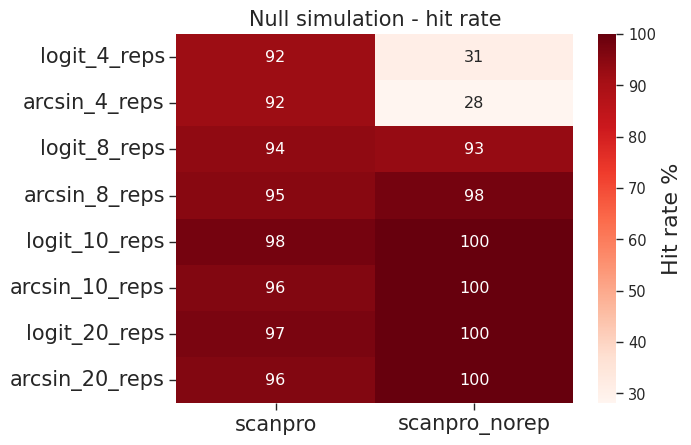

In [9]:
ax = sns.heatmap(null_sim_hitrates, annot=True, cmap="Reds", cbar_kws={'label': 'Hit rate %'}, fmt='g')

ax.set_title('Null simulation - hit rate', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(16)  # colorbar

#plt.savefig(f'{FIG_PATH}/benchmark_null_simulation_heatmap.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{FIG_PATH}/benchmark_null_simulation_heatmap.pdf', dpi=300, bbox_inches='tight')

plt.show()

### Simulation with differences hit rates

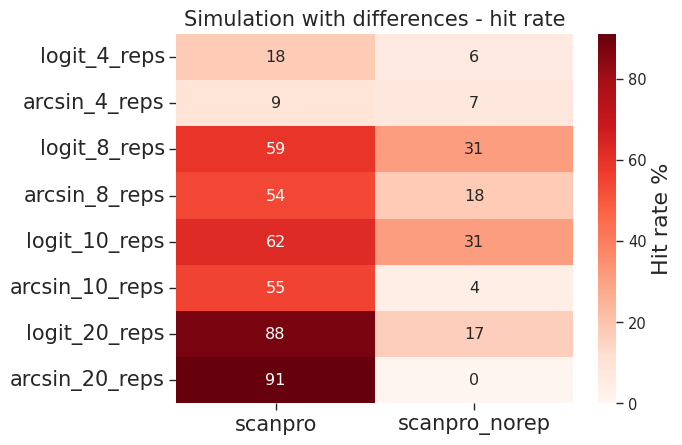

In [10]:
ax = sns.heatmap(difs_sim_hitrates, annot=True, cmap="Reds", cbar_kws={'label': 'Hit rate %'}, fmt='g')

ax.set_title('Simulation with differences - hit rate', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(16)  # colorbar

#plt.savefig(f'{FIG_PATH}/benchmark_null_simulation_heatmap.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{FIG_PATH}/benchmark_null_simulation_heatmap.pdf', dpi=300, bbox_inches='tight')

plt.show()

#### Correct assignment per cluster for datasets without replicates

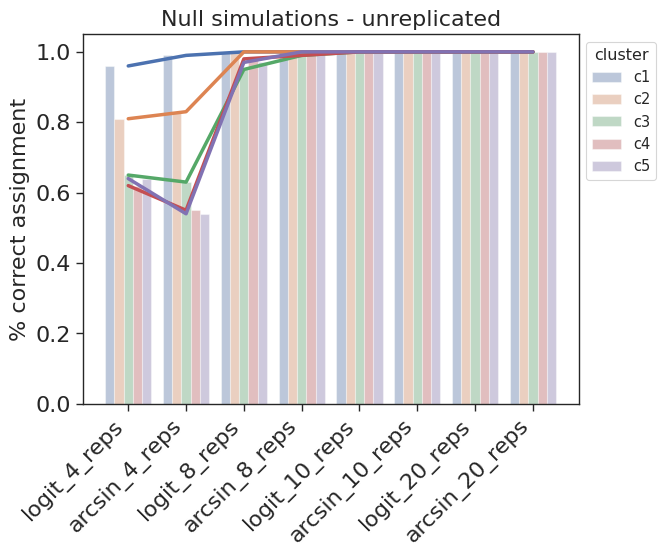

In [19]:
ax = sns.barplot(data=null_sim_hitrate_cluster, x='method', y='hit_rate', hue='cluster', alpha=0.4)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
sns.lineplot(data=null_sim_hitrate_cluster, x='method', y='hit_rate', hue='cluster', ax=ax, linewidth=2.5, legend=False)

#ax.axhline(0.05, linestyle='--', color='black')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_ylabel("% correct assignment", fontsize=16)
ax.set_xlabel("")
ax.set_title('Null simulations - unreplicated', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)


#plt.savefig(f'{FIG_PATH}/benchmark_diff_simulation_clusters_native.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{FIG_PATH}/benchmark_diff_simulation_clusters_native.pdf', dpi=300, bbox_inches='tight')


plt.show()

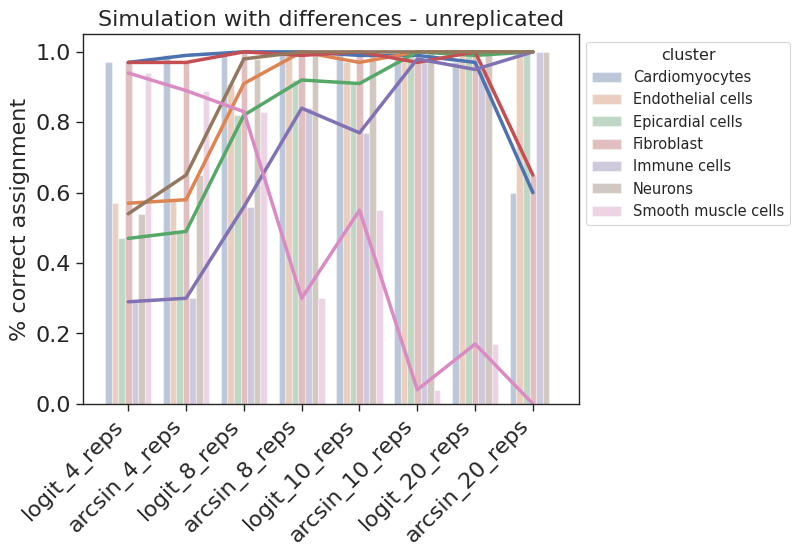

In [20]:
ax = sns.barplot(data=difs_sim_hitrate_cluster, x='method', y='hit_rate', hue='cluster', alpha=0.4)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
sns.lineplot(data=difs_sim_hitrate_cluster, x='method', y='hit_rate', hue='cluster', ax=ax, linewidth=2.5, legend=False)

#ax.axhline(0.05, linestyle='--', color='black')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set_ylabel("% correct assignment", fontsize=16)
ax.set_xlabel("")
ax.set_title('Simulation with differences - unreplicated', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)


#plt.savefig(f'{FIG_PATH}/benchmark_diff_simulation_clusters_native.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{FIG_PATH}/benchmark_diff_simulation_clusters_native.pdf', dpi=300, bbox_inches='tight')


plt.show()

## Benchmarking bootstrapping

### sensitivity vs false positive rate

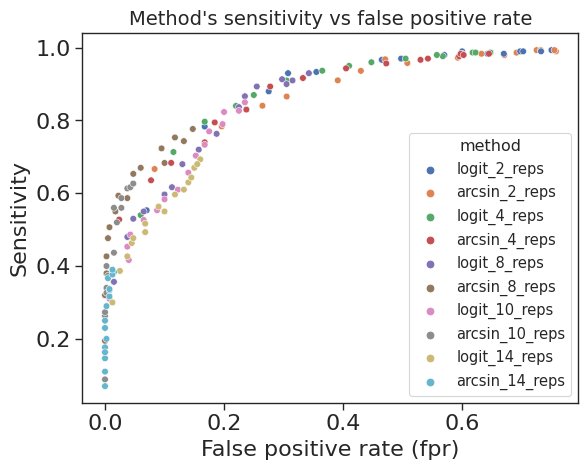

In [30]:
ax = sns.scatterplot(data=benchmark_stats, x='fpr', y='sensitivity', hue='method')

ax.set_ylabel('Sensitivity', fontsize=16)
ax.set_xlabel('False positive rate (fpr)', fontsize=16)

ax.set_title("Method's sensitivity vs false positive rate", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=16)

#plt.savefig(f'{FIG_PATH}/benchmark_sensitivity_fpr.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{FIG_PATH}/benchmark_sensitivity_fpr.pdf', dpi=300, bbox_inches='tight')

### Mean counts vs auroc

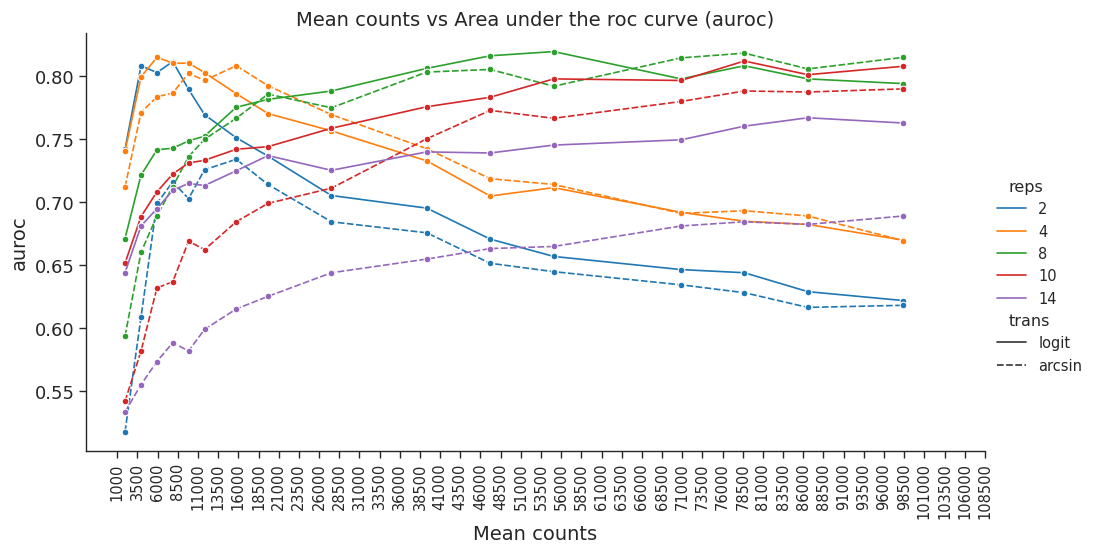

In [29]:
ticks = np.arange(1000, 110000, 2500)
x_labels = [str(label) for label in ticks]

plot_3 = sns.relplot(data=benchmark_stats, x='mean_counts', y='auroc', kind='line',
                     hue='reps', aspect=2, marker='o', style='trans', palette='tab10')

for ax in plot_3.axes.flatten():
    ax.set_xticks(ticks, x_labels, rotation=90, ha='center')
    ax.set(xlabel='Mean counts', ylabel='auroc')

ax.set_ylabel('auroc', fontsize=14)
ax.set_xlabel('Mean counts', fontsize=14)

ax.set_title("Mean counts vs Area under the roc curve (auroc)", fontsize=14)

plt.tick_params(axis='y', which='major', labelsize=13)
    
#plt.savefig(f'{FIG_PATH}/benchmark_mean_counts_auroc.png', dpi=300, bbox_inches='tight')
#plt.savefig(f'{FIG_PATH}/benchmark_mean_counts_auroc.pdf', dpi=300, bbox_inches='tight')

plt.show()